# Ejercicio módulo 3

# Fase 1: Exploración y Limpieza 1

## 1. Exploración inicial

In [833]:
# Importación de librerías:

import pandas as pd
import numpy as np

# Ejecución de la función de Pandas que asegura que se muestran todas las columnas al vistualizar los datos de los csv.
pd.set_option('display.max_columns', None) 

In [834]:
# Creación del df para cada csv

df_flight= pd.read_csv('Customer Flight Activity.csv')
df_loyalty = pd.read_csv('Customer Loyalty History.csv')

In [835]:
# Consulta de columnas de cada df para ver cómo unirlos y trabajar con un solo conjunto de datos.

print(df_flight.columns)
print(df_loyalty.columns)

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')
Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')


In [836]:
# Opción escogida: .merge() con 'inner' para mantener solo con los clientes comunes a los dos archivos. 

df_clients = df_flight.merge(df_loyalty, on='Loyalty Number', how='inner')

In [837]:
## Proceso EDA:

In [838]:
df_clients.shape # Consulta de la estructura del df: numero de filas x numero de columnas.

(405624, 25)

In [839]:
df_clients.head() # 5 primeras filas.

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [840]:
df_clients.sample(5) # 5 filas aleatorias

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
348763,671928,2018,9,8,7,15,3315,331.0,0,0,Canada,Quebec,Montreal,H2T 2J6,Female,College,NaN,Single,Star,4159.59,Standard,2016,9,NaN,NaN
289013,191917,2018,6,13,0,13,2210,221.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,NaN,Single,Star,7017.15,Standard,2017,2,NaN,NaN
329888,567805,2018,8,0,0,0,0,0.0,0,0,Canada,Ontario,Sudbury,M5V 1G5,Female,College,NaN,Single,Nova,3573.29,Standard,2018,10,NaN,NaN
29129,748649,2017,2,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V6E 3Z3,Female,Bachelor,54457.0,Divorced,Nova,3436.13,Standard,2016,3,NaN,NaN
132973,879462,2017,8,12,0,12,960,96.0,0,0,Canada,Ontario,Toronto,M2M 6J7,Female,Bachelor,57134.0,Married,Aurora,5254.73,Standard,2014,6,NaN,NaN


In [841]:
df_clients.tail() #5 últimas filas. Permite comprobar que los 'loyalty number' no son correlativos y son diferentes al índice.

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
405619,999902,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
405620,999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
405621,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
405622,999982,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,NaN,Married,Star,2631.56,Standard,2018,7,NaN,NaN
405623,999986,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN


In [842]:
df_clients.info() # Consulta de información sobre el nombre de las columnas, tipo de datos y presencia de valores nulos.

# Observaciones:
# - No se observan columnas repetidas.

# - Tipos de datos:
#   - 'Points Accumulated': tiene sentido que sea float o podría ser integer?
#   - 'Postal Code': normalmente no tienen letras. Podría ser int?
#   - 'Loyalty Card': qué tipo de valor tiene? Podría ser un booleano?

# - Columnas con información de mes y año: deberían ser int. Las necesitaremos todas?

# - Nulos o datos faltantes:
#   - 'Salary': tiene bastantes nulos (10.000 aprox.). Aún por determinar si son excesivos.
#   - Columnas con información sobre cancelación: tienen un número elevado de nulos/ falta de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

In [843]:
# Al extraer toda la información comentada, no es necesario usar .column o dtypes para consultar más datos sobre nombre de columna o tipos.

# Se procede a consultar los datos según tipo de columna (numérica o categórica).

In [844]:
# Numérica tipo integer:
df_clients.select_dtypes(include=[int])

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Redeemed,Dollar Cost Points Redeemed,Enrollment Year,Enrollment Month
0,100018,2017,1,3,0,3,1521,0,0,2016,8
1,100102,2017,1,10,4,14,2030,0,0,2013,3
2,100140,2017,1,6,0,6,1200,0,0,2016,7
3,100214,2017,1,0,0,0,0,0,0,2015,8
4,100272,2017,1,0,0,0,0,0,0,2014,1
...,...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0,0,2014,5
405620,999911,2018,12,0,0,0,0,0,0,2012,8
405621,999940,2018,12,3,0,3,1233,0,0,2017,7
405622,999982,2018,12,0,0,0,0,0,0,2018,7


In [845]:
# No parece haber valores atípicos.
# Aun así, se comprueba que no haya valores atípicos en las columnas con meses:

print(df_clients['Enrollment Month'].unique())
print(df_clients['Month'].unique())

[ 8  3  7  1  9  5 10  2  4  6 11 12]
[ 1  9  2  3 11  4  5  7  6  8 10 12]


In [846]:
# Numérica tipo float:
df_clients.select_dtypes(include=[float])

# Se vuelven a observar aspectos comentados en líneas de código anteriores, que se tratarán en la fase de limpieza (ejercicio 2).
# Se observa como 'Salary' es float pero el decimal siempre es 0. Debería ser int.

,Points Accumulated,Salary,CLV,Cancellation Year,Cancellation Month
0,152.0,92552.0,7919.20,NaN,NaN
1,203.0,NaN,2887.74,NaN,NaN
2,120.0,NaN,2838.07,NaN,NaN
3,0.0,63253.0,4170.57,NaN,NaN
4,0.0,91163.0,6622.05,NaN,NaN
...,...,...,...,...,...
405619,0.0,NaN,7290.07,NaN,NaN
405620,0.0,217943.0,8564.77,NaN,NaN
405621,123.0,47670.0,20266.50,NaN,NaN
405622,0.0,NaN,2631.56,NaN,NaN


In [847]:
# Comprobación de 'Salary', que se tratará en la fase de limpieza (ejercicio 2):

df_clients['Salary'].sample(10)

161866     74263.0
47485      69942.0
382906     51041.0
169966     68069.0
76877      78202.0
242832     85959.0
93963      97878.0
68337          NaN
63660      82230.0
41507     103331.0
Name: Salary, dtype: float64

In [848]:
# También se observa como 'Cancellation Year' y 'Cancellation Month' están muy vacías.
# Comprobación con muestra aleatoria de observaciones:

df_clients['Cancellation Year'].sample(10)

397588       NaN
310040       NaN
216528       NaN
326287       NaN
25076        NaN
399088    2015.0
21036     2014.0
206203       NaN
75090        NaN
44587        NaN
Name: Cancellation Year, dtype: float64

In [849]:
df_clients['Cancellation Month'].sample(10)

214747    NaN
257404    NaN
345554    NaN
246921    NaN
115796    2.0
356054    NaN
81177     NaN
115514    NaN
266649    NaN
260353    NaN
Name: Cancellation Month, dtype: float64

In [850]:
# Columnas categóricas:
df_clients.select_dtypes(include='O')

# Se comprueba como el código postal incluye letras: no puede ser int y tendrá que mantenerse en string (object).

,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type
0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,Standard
1,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,Standard
2,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,Standard
3,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,Standard
4,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,Divorced,Star,Standard
...,...,...,...,...,...,...,...,...,...
405619,Canada,Ontario,Toronto,M1R 4K3,Male,College,Married,Aurora,Standard
405620,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,Single,Nova,Standard
405621,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,Married,Nova,Standard
405622,Canada,British Columbia,Victoria,V10 6T5,Male,College,Married,Star,Standard


In [851]:
# Para consultar valores únicos de cada columna categórica, se ejecuta un bucle for:

for col in df_clients.select_dtypes(include='O'):
    print(col)
    print('-----------------------------')
    print(df_clients[col].unique())

# Permite ver como 'Country' solo tiene un valor.

Country
-----------------------------
['Canada']
Province
-----------------------------
['Alberta' 'Ontario' 'British Columbia' 'Saskatchewan' 'Quebec'
 'Newfoundland' 'Manitoba' 'New Brunswick' 'Nova Scotia'
 'Prince Edward Island' 'Yukon']
City
-----------------------------
['Edmonton' 'Toronto' 'Dawson Creek' 'Vancouver' 'Regina' 'Montreal'
 'Sudbury' 'Quebec City' 'Peace River' "St. John's" 'Tremblant' 'Ottawa'
 'Trenton' 'Winnipeg' 'Thunder Bay' 'West Vancouver' 'Fredericton'
 'London' 'Halifax' 'Moncton' 'Banff' 'Kingston' 'Whistler'
 'Charlottetown' 'Hull' 'Victoria' 'Calgary' 'Kelowna' 'Whitehorse']
Postal Code
-----------------------------
['T9G 1W3' 'M1R 4K3' 'U5I 4F1' 'V5R 1W3' 'P1L 8X8' 'P1J 8T7' 'S6J 3G0'
 'H2T 9K8' 'V6E 3D9' 'M5V 1G5' 'H2Y 4R4' 'M8Y 4K8' 'V6E 3Z3' 'G1B 3L5'
 'T9O 2W2' 'A1C 6H9' 'H5Y 2S9' 'K1F 2R2' 'K8V 4B2' 'R3R 3T4' 'P1W 1K4'
 'K8T 5M5' 'V6V 8Z3' 'M2M 7K8' 'E3B 2H2' 'M5B 3E4' 'H2Y 2W2' 'P5S 6R4'
 'P2T 6G3' 'B3J 9S2' 'B3C 2M8' 'H4G 3T4' 'R6Y 4T5' 'H2T 2J6

In [852]:
# Consulta de las estadísticas básicas para todos los tipos de columnas:

df_clients.describe().T

# Se observa como el salario tiene un valor mínimo negativo, valor atípico que se tendrá que solventar.

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00
Flights with Companions,405624.0,1.031805,2.076869,0.00,0.00,0.00,1.00,11.00
Total Flights,405624.0,5.146858,6.521227,0.00,0.00,1.00,10.00,32.00
Distance,405624.0,1208.880059,1433.155320,0.00,0.00,488.00,2336.00,6293.00
Points Accumulated,405624.0,123.692721,146.599831,0.00,0.00,50.00,239.00,676.50
Points Redeemed,405624.0,30.696872,125.486049,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.00,0.00,0.00,0.00,71.00


In [853]:
# Por último, se consultan valores duplicados y nulos:

In [808]:
# Valores duplicados:

df_clients.duplicated().sum()

np.int64(1864)

In [854]:
# Al ver que hay muchos duplicados, interesa ver si hay 'Loyalty Number' repetidos, que correspondería a la misma persona:

df_clients.duplicated('Loyalty Number').sum()

np.int64(388887)

In [855]:
# Se muestran los 'Loyalty Number' en orden para ver los datos:

df_clients[df_clients.duplicated(["Loyalty Number"], keep=False)].sort_values(by="Loyalty Number")


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
388723,100018,2018,12,17,6,23,4945,494.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
185911,100018,2017,12,6,0,6,1908,190.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
101406,100018,2017,7,10,0,10,3870,387.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
287317,100018,2018,6,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304217,999986,2018,6,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
321118,999986,2018,7,15,0,15,1995,199.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
354920,999986,2018,9,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
185910,999986,2017,11,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN


In [856]:
# Se observa cómo el mismo ID tiene diferentes datos, por lo que no se pueden eliminar filas sin más.
# Se tendrá en cuenta esta particularidad para el análisis posterior, aplicando filtros si es necesario.

In [857]:
# Valores nulos:

df_clients.isnull().sum()

Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
dtype: int64

## 2. Limpieza de datos

In [858]:
# Gestión de nulos:

# La exploración ha mostrado algunas columnas con muchos nulos, se calcula el % para ver cómo proceder:

# % nulos
nulls = df_clients.isnull().sum()/df_clients.shape[0]*100

# % nulos ordenados de mayor a menor
nulls.sort_values(ascending=False)

Cancellation Month             87.657535
Cancellation Year              87.657535
Salary                         25.312112
Postal Code                     0.000000
Enrollment Month                0.000000
Enrollment Year                 0.000000
Enrollment Type                 0.000000
CLV                             0.000000
Loyalty Card                    0.000000
Marital Status                  0.000000
Education                       0.000000
Gender                          0.000000
Loyalty Number                  0.000000
Year                            0.000000
Province                        0.000000
Country                         0.000000
Dollar Cost Points Redeemed     0.000000
Points Redeemed                 0.000000
Points Accumulated              0.000000
Distance                        0.000000
Total Flights                   0.000000
Flights with Companions         0.000000
Flights Booked                  0.000000
Month                           0.000000
City            

In [859]:
# Dado que el análisis requerido no necesita las columnas de cancelación, se eliminan al tener un % alto de nulos:

df_clients.drop(['Cancellation Month', 'Cancellation Year'], axis=1, inplace=True)
df_clients.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month'],
      dtype='object')

In [860]:
# Solo queda 1 columna con nulos: 'Salary', que es de tipo float (se tendrá que cambiar el tipo de datos, pero primero se deberán gestionar los nulos para evitar errores).

# Es de tipo numérica y el % de nulos es alto (25%), por lo que se usarán técnicas avanzadas para tratarlos.

# Técnica escogida: IterativeImputer. Importación de librería:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [861]:
imputer_iter = IterativeImputer(max_iter = 100, random_state = 42)
df_clients['Salary'] = imputer_iter.fit_transform(df_clients[['Salary']])

In [863]:
# Comprobación nulos:

df_clients.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
dtype: int64

In [864]:
# Eliminación de valores duplicados:

df_clients.drop_duplicates(inplace=True)

In [ ]:
# Comprobación eliminación:

df_clients.duplicated().sum()

np.int64(0)

In [866]:
# Corrección del tipo de datos, en base a las observaciones del EDA.

df_clients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13  Post

In [867]:
# Int:

df_clients['Salary'] = df_clients['Salary'].astype(int)

In [868]:
# Años: pese a ser int, se ha valorado no cambiar a datetime para facilitar su uso en la visualización de datos, ya que el formato datetime añade el formato hora, que no tendría contenido y dificultaría la lectura del gráfico.
# Quedará con dos datos:

df_clients['Year'].unique()

array([2017, 2018])

In [869]:
# Cambio valores negativos a positivos en columna 'Salary':

df_clients['Salary'] = np.abs(df_clients['Salary'])

# Fase 2: Visualización

In [870]:
# Importación de librerías:

import matplotlib.pyplot as plt
import seaborn as sns

In [871]:
df_clients.columns # Consulta de columnas a usar.

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month'],
      dtype='object')

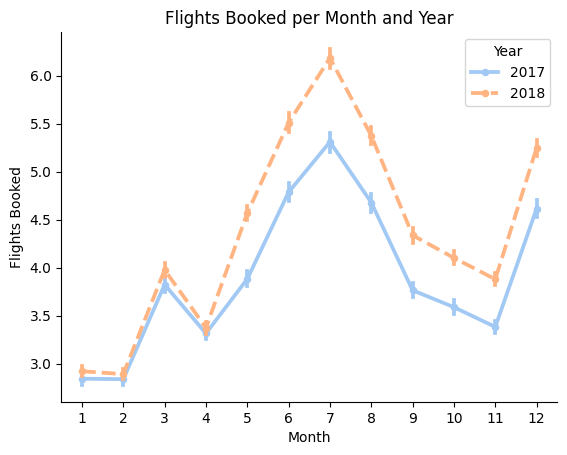

In [872]:
# 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante cada año?

# Creación del gráfico de puntos:
sns.pointplot(data=df_clients, x="Month", y="Flights Booked", hue="Year", markers=".", palette="pastel", linestyles=["-", "--"]) #Contenido y características gráfico.

plt.xlabel("Month") # Título eje x
plt.ylabel("Flights Booked") # Título eje y
plt.title("Flights Booked per Month and Year") # Título gráfico

plt.gca().spines['right'].set_visible(False) #Eliminación línea derecha gráfico.
plt.gca().spines["top"].set_visible(False) #Eliminación línea superior gráfico.

plt.show() # Mostrar el gráfico. Al ser Jupyter Notbook, no es necesario usar esta función, pero se ha decidido mantenerlo dado que es buena práctica para futuros usos en otro tipo de archivos (ej. py).


- En 2018 hubieron más reservas de vuelos que en 2017. Sería interesante disponer de datos de los años posteriores para analizar si la tendencia sigue al alza.

- Las líneas muestran una distribución parecida de las reservas para los dos años, manteniendo los picos y valles en los mismos meses.

- A partir de abril, coincidiendo con el inicio de la primavera en el hemisferio norte, las reservas empezaron a subir hasta llegar al pico anual en el mes de julio, con una media de más de 5 reservas en 2017 y más de 6 reservas por cliente/a en 2018. El aumento podría relacionarse con el clima y las vacaciones de verano en esta zona del planeta.

- Después de julio, el mes con más reservas fue diciembre (entre 4 y 5 en 2017 y entre 5 y 5.5 en 2018), mes en el que muchas familias viajan para celebrar la Navidad y/o disponen de días de vacaciones.

- En contraposición, los meses con menos reservas fueron enero y febrero, en los que los vuelos reservados fueron inferiores a 3, periodo posterior a las vacaciones de Navidad.


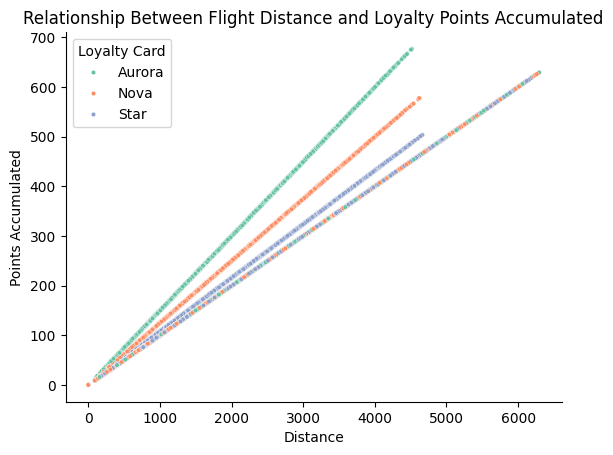

In [873]:
# 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

# Creación del gráfico de dispersión:
sns.scatterplot(x = 'Distance', y = "Points Accumulated", hue = 'Loyalty Card', data = df_clients, s=10, palette="Set2") #Contenido y características gráfico.

plt.xlabel("Distance") # Título eje x
plt.ylabel("Points Accumulated") # Título eje y
plt.title('Relationship Between Flight Distance and Loyalty Points Accumulated') # Título gráfico

plt.gca().spines['right'].set_visible(False) #Eliminación línea derecha gráfico.
plt.gca().spines["top"].set_visible(False) #Eliminación línea superior gráfico.

plt.show() # Mostrar el gráfico

- Se observa una relación positiva entre los puntos acumulados y la distancia recorrida. Se precisaría más información del sistema de puntos para comprender esta distribución, pero es probable que en número de kilómetros recorridos vayan asociados a un número de puntos determinados, razón por la que el gráfico muestra una distribución perfectamente lineal.

- El máximo de puntos acumulados por clientes es de 700 y la distancia recorrida de más de 6.000km.

- El gráfico muestra 4 líneas con los clientes y clientas de la compañía, dibujando 3 líneas con colores diferenciados según tipo de 'loyalty card' (Aurora, Nova y Star) y una cuarta con una mezcla de colores e inferior a las otras.


- La categoría con la que se ganan más puntos es Aurora, que permite acumular más por la misma distancia recorrida, seguida de Nova y Star. Cuanta más distancia, más se separan las líneas de distribución.

- Sin embargo, existe una 4a línea que muestra que hay clientes con 'loyalty card' que ganan menos puntos independientemente de su categoria. Estos casos podrían explicarse por diferentes razones y se tendrían que analizar en función del número de reservas realizadas, los años en la compañía, etc. Se reserva esta opción a futuros análisis en función de la necesidad del estudio.

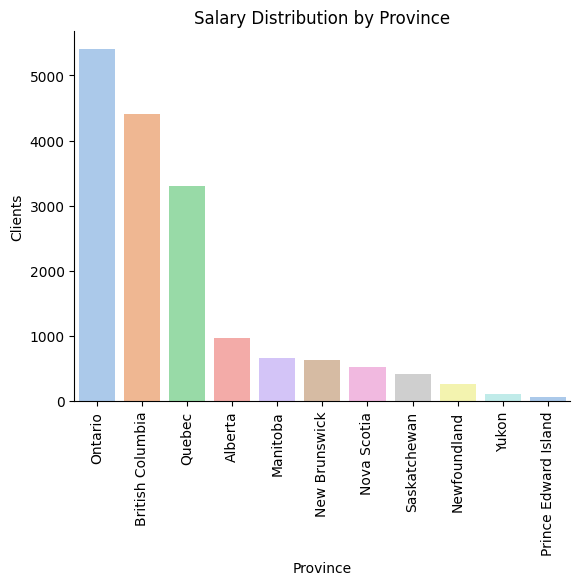

In [874]:
# 3. ¿Cuál es la distribución de los clientes por provincia o estado?
# Es decir, poder ver cuántos clientes hay en cada provincia.

df_unique_clients = (df_clients.groupby("Province")["Loyalty Number"].nunique()).reset_index().sort_values(by='Loyalty Number', ascending=False) # Filtrado por clientes únicos/as y agrupamos por provincia

# Creación del gráfico de barras:
sns.barplot(x = "Province", y = "Loyalty Number", data = df_unique_clients, hue='Province', palette='pastel') #Contenido y características gráfico.

plt.title("Salary Distribution by Province") # Título gráfico

plt.xlabel("Province") #Título eje x
plt.xticks(rotation = 90) #Rotación nombres eje x
plt.ylabel("Clients") #Título eje y

plt.gca().spines['right'].set_visible(False) #Eliminación línea derecha gráfico.
plt.gca().spines["top"].set_visible(False) #Eliminación línea superior gráfico.

plt.show() #Mostrar el gráfico

- La provincia con más clientes es Ontario, con más de 5.000 personas.

- British Columbia y Quebec tambien cuentan con gran cantidad de clientes, siendo la primera superior a 4.000 y la segunda superior a 3.000.

- Las otras 8 provincias presentan valores notablemente más reducidos, todas por debajo de las 1.000 personas.

- Las provincias de Yukon y Prince Edward Island tienen muy pocos clientes/as, ya que se observan valores proximos a 0.

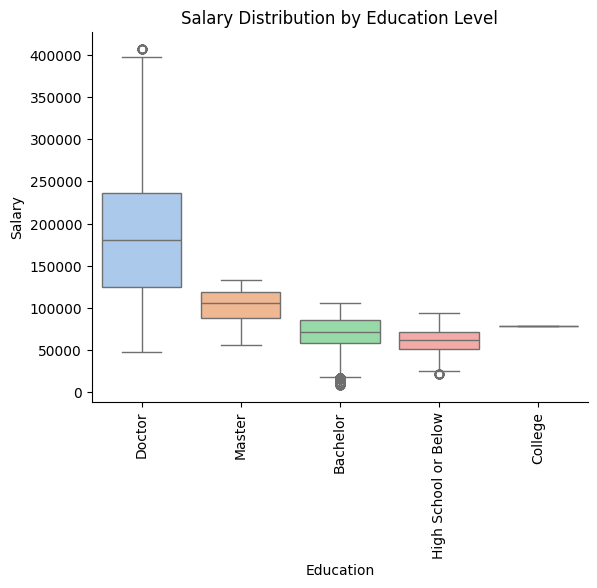

In [875]:
# 4. Compara el salario promedio por nivel educativo.

df_clients_salary = df_clients.sort_values(by='Salary', ascending=False) # Orden del df según salario.

# Creación del gráfico de bigotes:
sns.boxplot(x="Education", y="Salary", data=df_clients_salary, hue="Education", palette="pastel") #Contenido y características gráfico.

plt.title("Salary Distribution by Education Level") # Título gráfico

plt.xlabel("Education") # Título eje x
plt.xticks(rotation=90) # Rotación nombres eje x
plt.ylabel("Salary") # Título eje y

plt.gca().spines['right'].set_visible(False) #Eliminación línea derecha gráfico.
plt.gca().spines["top"].set_visible(False) #Eliminación línea superior gráfico.

plt.show() # Mostrar el gráfico.


- El gráfico muestra una relación positiva entre el nivel de estudios y el salario estimado, ya que a mayor nivel de estudios, mayor es el salario.

- Las personas doctoradas son las que cuentan con un salario superior y las que tienen estudios obligatorios o inferiores, menor.

- La mitad de las personas doctoradas cobran un salario estimado de aproximadamente 180.000 dolares anuales y el 75% tiene un salario estimado inferior a 140.000 dolares aproximadamente. Se observa un valor atípico con un salario de 400.000 dolares.

- El 75% de clientes con estudios de máster cobran menos que el 25% de las personas doctoradas. Esta distribución se repite con las personas con licenciatura y las de máster, ya que el 75% de las primeras cobra menos que el 25% de las segundas.

- Se observan valores extremos entre clientes con estudios de licenciatura, ya que presentan salarios próximos a 0.

- El 50% de las personas con estudios de licenciatura cobran lo mismo que el 75% que tiene estudios de secundaria o inferiores.

- El gráfico muestra pocas personas con estudios universitarios o técnicos. Todas presentan salarios de hasta 100.000 dólares.

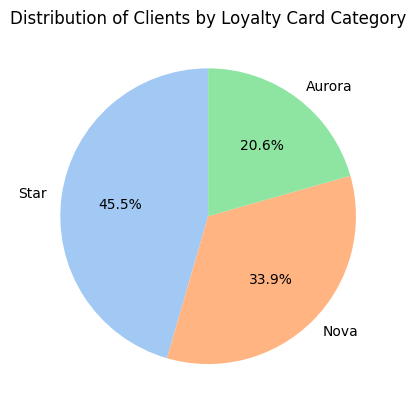

In [876]:
# 5. ¿Cuál es el porcentaje de clientes por cada tipo de tarjeta de fidelidad?

df_clients_loyalty = df_clients['Loyalty Card'].value_counts() # Núm. de clientes con loyalty card.

# Creación del gráfico de sectores (piechart):
plt.pie(df_clients_loyalty, labels=df_clients_loyalty.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel", len(df_clients_loyalty))) #Contenido y características gráfico.

plt.title("Distribution of Clients by Loyalty Card Category") # Título gráfico

plt.show() # Mostrar el gráfico


- La tarjeta de fidelidad más común es la Star. La tienen el 45,5% de los/las clientes.

- El 33,9% tienen la tarjeta Nova y el 20,6% la Aurora, siendo la menos común.

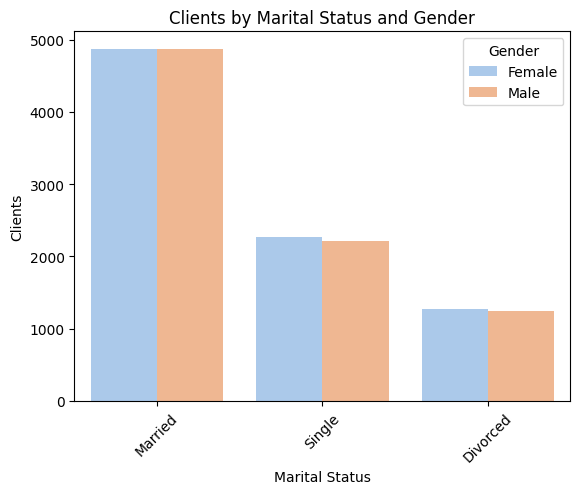

In [877]:
# 6. ¿Cómo se distribuyen los clientes según su estado civil y género?
# Es decir, una gráfica donde vea a mis clientes separados por la categoría de estado civil y que en cada categoría vea cuáles son hombres y cuales mujeres.

df_loyalty_marital = df_loyalty['Marital Status'].value_counts().index #Valores de 'Marital Status' ordenados.

# Creación del gráfico de barras:
sns.countplot(x='Marital Status', data=df_loyalty, palette='pastel', order=df_loyalty_marital, hue = 'Gender') #Contenido y características gráfico.

plt.title("Clients by Marital Status and Gender") # Título gráfico

plt.xticks(rotation=45) # Rotación nombres eje x

plt.xlabel("Marital Status") # Título eje x
plt.ylabel("Clients") # Título eje y

plt.show() # Mostrar la gráfica

- Se observa como la mayoría de clientes son personas casadas, seguidas de las solteras y las divorciadas.

- Hay el doble de clientes/as casados/as que solteros/as y tres veces más casados/as que divorciados/as.

- No se aprecian diferencias por género en ninguno de los estados civiles.
